In [1]:
%run /home/gridsan/hjananthan/PyD4M/D4M.ipynb

## Intro to D4M

### Creating, Display, Save an Associative Array

Hello! This is a test on the basic Assoc Array construction.  Associative Array takes on entries of triplets, and it will parse an array of substrings that is delimited by char delimiter. --Please note that this delimiter is indicated as the last char in the string.

In [ ]:
row = "a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,"
column = "a,aa,aaa,b,bb,bbb,a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,"
values = "a-a,a-aa,a-aaa,a-b,a-bb,a-bbb,a-a,aa-a,aaa-a,b-a,bb-a,bbb-a,a-a,aa-aa,aaa-aaa,b-b,bb-bb,bbb-bbb,"

# Create assoc array and list triples
A = Assoc(row, column, values)A.triples()

This is the data structure of the Associative Array Class

In [ ]:
print(A)

The Assoc.printfull() method allows it to be printed in a tabular form.

In [ ]:
A.printfull()

When written into CSV form, the data is stored in the tabular form

In [ ]:
writecsv(A, "A.csv")

### Read and Select SubAssociative Arrays

Subarrays of Associative Arrays have much of the same syntax as with matrices.

We start by reading our CSV file into an associative array.

In [ ]:
A = readcsv("A.csv")
A.printfull()

Get rows a and b

In [ ]:
A["a,b,",:].printfull()

Get rows containing a and columns 1 through 3.

In [ ]:
A[contains("a,"), 1:3].printfull()

Get rows a through b

In [ ]:
A["a,:,b,",:].printfull()

Convert values to 0 and 1.

In [ ]:
print(A.logical().adj.data)
A["a,:,b,",:].logical().printfull()

## Analyze Entities in News Articles

Load entities from 10,000 news articles and print the first few rows.

In [2]:
A = readcsv("entity.csv")

A[0:10,:].printfull()

                    doc       entity     position      type
1    19960825_13108.txt  addis ababa  54;132;974;  LOCATION
2    19960930_84704.txt  addis ababa          60;  LOCATION
3    19961004_96087.txt  addis ababa      61;305;  LOCATION
4    19961006_98377.txt  addis ababa          68;  LOCATION
5   19961009_104796.txt  addis ababa      59;443;  LOCATION
6   19961010_107656.txt  addis ababa          61;  LOCATION
7   19961031_158809.txt  addis ababa        2109;  LOCATION
8   19961101_159647.txt  addis ababa        1485;  LOCATION
9   19961113_185784.txt  addis ababa          62;  LOCATION
10    19960821_6808.txt         aden         212;  LOCATION
11  19961026_145749.txt         aden          58;  LOCATION


/state/partition1/llgrid/pkg/anaconda2-5.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:289: UserWarning: Slice objects here are inclusive on right endpoint.


Show dimensions, number of non-zero entries of A, and the density of A.

In [3]:
print(A.size(),A.nnz())

(1.0*A.nnz())/(A.size()[0]*A.size()[1])

((47089, 4), 188356)


1.0

### Construct and Display a Sparse Associative Array of the Data

Grab doc, entity, position, and type columns and combine type and entity with '|' separator.

In [4]:
row, col, doc = A[:,'doc,'].find()
row, col, entity = A[:,'entity,'].find()
row, col, position = A[:,'position,'].find()
row, col, rowType = A[:,'type,'].find()
typeEntity = catstr(rowType,'|',entity)

Create a sparse associative array of all the data and show a few rows.

In [5]:
E = Assoc(doc,typeEntity,position)

print(E[0:1,:])
E[0:2,:].transpose().printfull()

Row indices: ['19960820_2304.txt' '19960820_2324.txt']
Column indices: ['LOCATION|britain' 'LOCATION|england' 'LOCATION|london'
 'LOCATION|united states' 'LOCATION|washington' 'PERSON|arshad mohammed'
 'PERSON|eddie george' 'PERSON|kenneth clarke' 'TIME|1996-08-20'
 'TIME|1997-09-01']
Values: ['1280;' '1636;' '167;853;1808;' '1;' '55;' '59;' '755;' '76;' '77;']
Adjacency array: 
[[0 0 0 4 5 9 0 0 4 7]
 [8 3 6 0 0 0 1 2 4 0]]
                       19960820_2304.txt 19960820_2324.txt 19960820_2344.txt
LOCATION|britain                                       76;              335;
LOCATION|england                             167;853;1808;                  
LOCATION|europe                                                   1215;1638;
LOCATION|germany                                                       1138;
LOCATION|ireland                                                        347;
LOCATION|london                                        59;               43;
LOCATION|united states          

/state/partition1/llgrid/pkg/anaconda2-5.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:289: UserWarning: Slice objects here are inclusive on right endpoint.


Display dimensions of data, number of non-zero entries, and density of E

In [6]:
print(E.size(),E.nnz())

(1.0*E.nnz())/(E.size()[0]*E.size()[1])

((9974, 3657), 47089)


0.0012909967337006762

Plot transpose of the sparse data.

/state/partition1/llgrid/pkg/anaconda2-5.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:289: UserWarning: Slice objects here are inclusive on right endpoint.


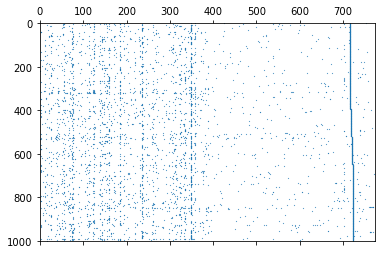

In [7]:
E[0:999,:].spy()

Create an adjacency matrix by multiplying $\mathsf{E}^\intercal \mathsf{E}$

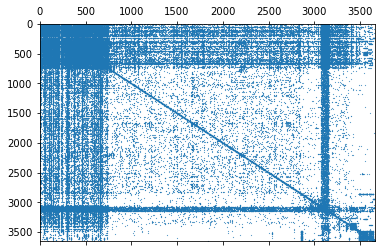

In [8]:
E = E.logical()
(E.transpose()@E).spy()

### Analyze Relationships

Define Relationships to examine.

In [9]:
l = 'LOCATION|boston,'
P = startswith('PERSON|,')
L = startswith('LOCATION|,')

Show all people mentioned in news articles mentioning Boston

In [10]:
people = (E[E[:,l].row,P].sum(0)>=1).col
print(people)

['PERSON|adam graves' 'PERSON|al west' 'PERSON|al yoon'
 'PERSON|alan mills' 'PERSON|alex fernandez' 'PERSON|bill lindsay'
 'PERSON|bobby ayala' 'PERSON|bobby jones' 'PERSON|bobby witt'
 'PERSON|brian cohen' 'PERSON|brian love' 'PERSON|carol stone'
 'PERSON|chris haney' 'PERSON|chris reese' 'PERSON|dan wilson'
 'PERSON|dave martinez' 'PERSON|david harris' 'PERSON|david howard'
 'PERSON|david orr' 'PERSON|dean palmer' 'PERSON|doug jones'
 'PERSON|duane arnold' 'PERSON|eric chaney' 'PERSON|geoffrey james'
 'PERSON|george david' 'PERSON|greg adams' 'PERSON|gustavo franco'
 'PERSON|ian simpson' 'PERSON|ismail dalla' 'PERSON|jack mcdowell'
 'PERSON|james black' 'PERSON|jason' 'PERSON|jason adkins'
 'PERSON|jason dickson' 'PERSON|javier leon' 'PERSON|jeff frye'
 'PERSON|jeff montgomery' 'PERSON|jeff nelson' 'PERSON|jeff thompson'
 'PERSON|jim carey' 'PERSON|joanne kelley' 'PERSON|jody reed'
 'PERSON|joe kennedy' 'PERSON|john avery' 'PERSON|john hancock'
 'PERSON|john moore' 'PERSON|juan gonz

/state/partition1/llgrid/pkg/anaconda2-5.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:265: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Show the most common locations for those found in Boston.

In [11]:
((E[:,people].transpose()@E[:,L]).sum(0) > 15).transpose().printfull()

                            0
LOCATION|anaheim         34.0
LOCATION|argentina       16.0
LOCATION|baltimore       37.0
LOCATION|boston          92.0
LOCATION|california      32.0
LOCATION|canada          24.0
LOCATION|chicago         57.0
LOCATION|cleveland       36.0
LOCATION|colorado        17.0
LOCATION|detroit         54.0
LOCATION|florida         16.0
LOCATION|france          22.0
LOCATION|houston         18.0
LOCATION|kansas          37.0
LOCATION|kansas city     37.0
LOCATION|lima            19.0
LOCATION|london          23.0
LOCATION|milwaukee       36.0
LOCATION|minnesota       36.0
LOCATION|montreal        18.0
LOCATION|new york       100.0
LOCATION|oakland         37.0
LOCATION|philadelphia    16.0
LOCATION|pittsburgh      17.0
LOCATION|seattle         37.0
LOCATION|texas           50.0
LOCATION|toronto         49.0
LOCATION|united states  105.0
LOCATION|washington      38.0


Do it all in one line.

In [12]:
((E[:,(E[E[:,l].row,P].sum(0)>=1).col].transpose()@E[:,L]).sum(0) > 15).transpose().printfull()

                            0
LOCATION|anaheim         34.0
LOCATION|argentina       16.0
LOCATION|baltimore       37.0
LOCATION|boston          92.0
LOCATION|california      32.0
LOCATION|canada          24.0
LOCATION|chicago         57.0
LOCATION|cleveland       36.0
LOCATION|colorado        17.0
LOCATION|detroit         54.0
LOCATION|florida         16.0
LOCATION|france          22.0
LOCATION|houston         18.0
LOCATION|kansas          37.0
LOCATION|kansas city     37.0
LOCATION|lima            19.0
LOCATION|london          23.0
LOCATION|milwaukee       36.0
LOCATION|minnesota       36.0
LOCATION|montreal        18.0
LOCATION|new york       100.0
LOCATION|oakland         37.0
LOCATION|philadelphia    16.0
LOCATION|pittsburgh      17.0
LOCATION|seattle         37.0
LOCATION|texas           50.0
LOCATION|toronto         49.0
LOCATION|united states  105.0
LOCATION|washington      38.0


/state/partition1/llgrid/pkg/anaconda2-5.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:265: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Scale to multiple cities at once.

In [13]:
l = "LOCATION|boston,LOCATION|chicago,LOCATION|detroit,"
((E[:,(E[E[:,l].row,P].sum(0)>=1).col].transpose() @ E[:,L]).sum(0)>15).transpose().printfull()

                             0
LOCATION|africa           25.0
LOCATION|anaheim          34.0
LOCATION|argentina        26.0
LOCATION|arizona          27.0
LOCATION|asia             28.0
LOCATION|atlanta          48.0
LOCATION|australia        40.0
LOCATION|baltimore        61.0
LOCATION|boston           92.0
LOCATION|britain          37.0
LOCATION|buenos aires     17.0
LOCATION|buffalo          38.0
LOCATION|cairo            17.0
LOCATION|california       60.0
LOCATION|canada           56.0
LOCATION|chicago         228.0
LOCATION|china            26.0
LOCATION|cincinnati       52.0
LOCATION|cleveland        40.0
LOCATION|colorado         31.0
LOCATION|czech republic   18.0
LOCATION|dallas           37.0
LOCATION|denver           24.0
LOCATION|detroit         111.0
LOCATION|england          55.0
LOCATION|estonia          16.0
LOCATION|europe           52.0
LOCATION|florida          42.0
LOCATION|france           48.0
LOCATION|germany          32.0
...                        ...
LOCATION

/state/partition1/llgrid/pkg/anaconda2-5.0.1/lib/python2.7/site-packages/ipykernel/__main__.py:265: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Let's make a Location-Location graph:

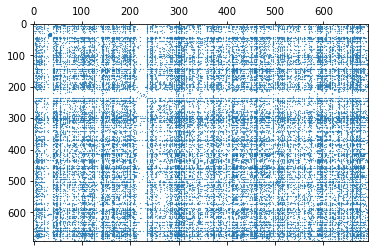

In [14]:
Locs = E[:,L].transpose()@E[:,L]
Locs = Locs.setadj(Locs.adj - sparse.diags(Locs.diag(),shape=Locs.adj.shape))
Locs.spy()

Which location pairs occur together the most?

In [15]:
Freqlocs = (Locs > 200)
row, col, _ = Freqlocs.find()
print(list(zip(row,col)))

[('LOCATION|new york', 'LOCATION|united states'), ('LOCATION|chicago', 'LOCATION|united states'), ('LOCATION|united states', 'LOCATION|new york'), ('LOCATION|tokyo', 'LOCATION|japan'), ('LOCATION|south africa', 'LOCATION|africa'), ('LOCATION|united states', 'LOCATION|washington'), ('LOCATION|africa', 'LOCATION|south africa'), ('LOCATION|japan', 'LOCATION|tokyo'), ('LOCATION|paris', 'LOCATION|france'), ('LOCATION|france', 'LOCATION|paris'), ('LOCATION|united states', 'LOCATION|chicago'), ('LOCATION|washington', 'LOCATION|united states')]


## Analyze Network Data

Read in 80,000 simulated network traffic logs from 1 day and print the first few rows

In [ ]:
A = readcsv('network.csv')
A[0:4,:].printfull()

Make data sparse and show dimensions and number of entries.

In [ ]:
E = val2col(A,'|')
print(E.size(),E.nnz())
E[0:4,:].transpose().printfull()

In [ ]:
E[:,startswith('src|,')].size()

Select fields and time windows to explore.

In [ ]:
S = startswith('src|,')
T1 = startswith('time|00:,')
D = startswith('dest|,')
T2 = startswith('time|23:,')

E1 = E[E[:,T1].row,:] # Data from time window 1
E2 = E[E[:,T2].row,:] # Data from time window 2

Create adjacency array of network traffic in each time window.

In [ ]:
A1 = E1[:,S].transpose() @ E1[:,D]
A2 = E2[:,S].transpose() @ E2[:,D]

A1.spy()
A2.spy()

Find source/destination pairs that are common to both time windows.

In [ ]:
A1.multiply(A2).printfull()